# Introdução a Aprendizado de Máquina

## Introdução

Utilizaremos a base de dados iris para esse tutorial. Essa é uma base de dados bastante conhecida contendo medidas das pétalas e sépalas da flor de íris. Os dados estão contidos em um arquivo chamado `Iris_Data.csv` encontrado no diretório [data](data).

In [185]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path = 'C:/Users/wesleya/Iris_Data.csv'
data = pd.read_csv(data_path)
print(data.iloc[:5])
data['sepal_area'] = data.sepal_length * data.sepal_width
print(data.iloc[:5, -3:])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


## Exercício 1

Carregue os dados do arquivo usando as técnicas do tutorial *Introduction_to_Machine_Learning_and_Toolkit*. Examine o arquivo.

Indique o seguinte:

* O número de pontos (linhas) (*Dica:* verifique o atributo `.shape` do dataframe.)
* O nome das colunas. (*Dica:* verifique o atributo `.columns` do dataframe.)
* Os tipos associados a cada coluna. (*Dica:* verifique o atributo `.dtypes` do dataframe.)

In [186]:
data.shape



(150, 6)

In [187]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_area'],
      dtype='object')

In [188]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
sepal_area      float64
dtype: object

## Exercício 2

Examine os nomes das espécies e note que todas elas começam com 'Iris-'. Remova essa parte do nome para tornar o nome mais curto. 

*Dica:* tem várias maneiras de fazer isso, você pode usar o [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html), por exemplo.

 Codigo á pesquisar data['ticker'] = data['species'].str.extract('(Iris-)')

In [189]:
data['species'] = data["species"].str.replace("Iris-", "")
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width species  sepal_area
0           5.1          3.5           1.4          0.2  setosa       17.85
1           4.9          3.0           1.4          0.2  setosa       14.70
2           4.7          3.2           1.3          0.2  setosa       15.04
3           4.6          3.1           1.5          0.2  setosa       14.26
4           5.0          3.6           1.4          0.2  setosa       18.00


## Exercício 3

Determine:
* A quantidade de cada espécie presente na base. (*Dica:* verifique o método `.value_counts` da série.)
* A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

*Dica:* para a última parte, o método `.describe` tem mediana, mas é chamada de *50%* quantile. `.describe` não tem faixa, portanto você precisará criar uma nova entrada na tabela com `max - min`.

In [190]:
data['species'].value_counts()
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,17.806533
std,0.828066,0.433594,1.764420,0.763161,3.368693
min,4.300000,2.000000,1.000000,0.100000,10.000000
25%,5.100000,2.800000,1.600000,0.300000,15.645000
50%,5.800000,3.000000,4.350000,1.300000,17.660000
75%,6.400000,3.300000,5.100000,1.800000,20.325000
max,7.900000,4.400000,6.900000,2.500000,30.020000


## Exercício 4

Calcule **para cada espécie** em um dataframe separado:

* A média de cada medida (sepal_length, sepal_width, petal_length, e petal_width).
* A mediana dessas medidas.

*Dica:* você pode usar o método [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do Pandas para agrupar as espécies antes de calcular as estatísticas.

Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela (com uma única chamada de groupby). Veja a seção da documentação [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) para algumas dicas.

In [191]:
data.drop_duplicates('species')

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,setosa,17.85
50,7.0,3.2,4.7,1.4,versicolor,22.40
100,6.3,3.3,6.0,2.5,virginica,20.79


## Exercício 5

Faça um scatter plot de `sepal_length` vs `sepal_width` usando Matplotlib. Coloque um `label` nos eixos e dê um título ao gráfico.

In [192]:
grouped = data.groupby('species')
grouped.agg([np.sum, np.mean, np.std])

sepal_length                  sepal_width                   \
                    sum   mean       std         sum   mean       std   
species                                                                 
setosa            250.3  5.006  0.352490       170.9  3.418  0.381024   
versicolor        296.8  5.936  0.516171       138.5  2.770  0.313798   
virginica         329.4  6.588  0.635880       148.7  2.974  0.322497   

           petal_length                  petal_width                   \
                    sum   mean       std         sum   mean       std   
species                                                                 
setosa             73.2  1.464  0.173511        12.2  0.244  0.107210   
versicolor        213.0  4.260  0.469911        66.3  1.326  0.197753   
virginica         277.6  5.552  0.551895       101.3  2.026  0.274650   

           sepal_area                     
                  sum     mean       std  
species                                   
setosa         860.44  17.2088  2.947688  
versicolor     826.31  16.5262  2.866882  
virginica      984.23  19.6846  3.458783

## Exercício 6

Faça um histograma de qualquer um dos quatro atributos. Nomeie os eixos e dê um título apropriado.

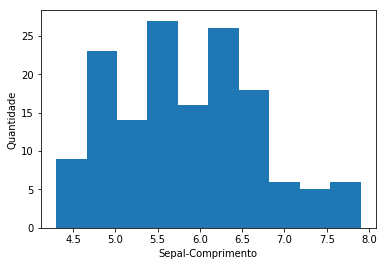

In [193]:
plt.hist(data['sepal_length'], bins=10)
plt.xlabel('Sepal-Comprimento')
plt.ylabel('Quantidade')
plt.show()

## Exercício 7

Agora crie um único gráfico com histogramas para cada atributo (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) sobrepostos. 

Dicas para fazer isso com os métodos de plotagem do Pandas se encontram em [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

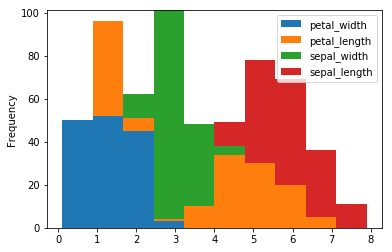

In [194]:
data_a = data[['petal_width','petal_length','sepal_width','sepal_length']]
data_a.plot.hist(stacked=True, bins=10)

## Exercício 8

Usando Pandas, faça um boxplot de cada medida da pétala e sépala. Veja a documentação para algumas dicas [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

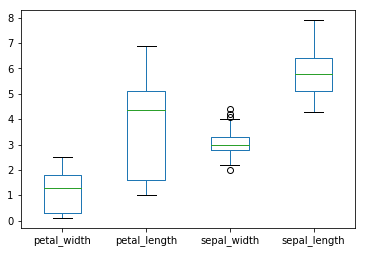

In [195]:
data_a.plot.box()

## Exercício 9

Agora faça um único boxplot onde os atributos estão separados no eixo-x e as espécies são coloridas por tons de cores diferentes.

*Dica:* veja a documentação para [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Note que o Seaborn é bem exigente quanto ao formato dos dados--para esse plot funcionar, o dataframe de entrada precisa ser manipulado para que cada linha contenha um único ponto (uma espécie, um tipo de medida e um valor da medida). Veja o Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) como uma dica.

Um exemplo desse formato para essa base:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

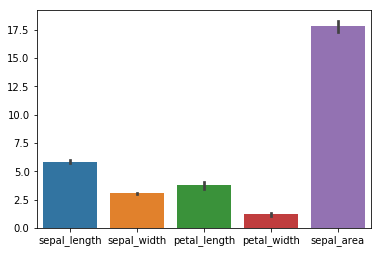

In [200]:
data.stack(level=-1, dropna=True)
sns.barplot(data=data) 

## Exercício 10

Faça um  [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) com o Seaborn para examinar a correlação entre cada uma das medidas.

*Dica:* esse plot pode parecer complicado, mas é na verdade uma única linha de código. Esse é o poder de expressabilidade do Seaborn junto do Pandas.